#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

In [2]:
df = pd.read_csv('dm-end1-1.csv', delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1000, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1000 non-null   float64
 1   pixel_0_1  1000 non-null   float64
 2   pixel_0_2  1000 non-null   float64
 3   pixel_0_3  1000 non-null   float64
 4   pixel_0_4  1000 non-null   float64
 5   pixel_0_5  1000 non-null   float64
 6   pixel_0_6  1000 non-null   float64
 7   pixel_0_7  1000 non-null   float64
 8   pixel_1_0  1000 non-null   float64
 9   pixel_1_1  1000 non-null   float64
 10  pixel_1_2  1000 non-null   float64
 11  pixel_1_3  1000 non-null   float64
 12  pixel_1_4  1000 non-null   float64
 13  pixel_1_5  1000 non-null   float64
 14  pixel_1_6  1000 non-null   float64
 15  pixel_1_7  1000 non-null   float64
 16  pixel_2_0  1000 non-null   float64
 17  pixel_2_1  1000 non-null   float64
 18  pixel_2_2  1000 non-null   float64
 19  pixel_2_3  1000 non-null   float64
 20

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,4.0,16.0,16.0,16.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,9.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,7.0,15.0,8.0,0.0,1
2,0.0,0.0,7.0,16.0,16.0,3.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,10.0,16.0,16.0,16.0,9.0,0.0,2
3,0.0,0.0,8.0,16.0,6.0,3.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,6.0,15.0,16.0,10.0,0.0,0.0,9
4,0.0,0.0,7.0,12.0,16.0,9.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,10.0,11.0,4.0,0.0,0.0,0.0,5


In [4]:
df_X = df.iloc[:,:-1]
obj = df['label']
display(df_X.head())
print(obj.head())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,4.0,16.0,16.0,16.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,9.0,0.0,0.0,0.0
1,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,7.0,15.0,8.0,0.0
2,0.0,0.0,7.0,16.0,16.0,3.0,0.0,0.0,0.0,7.0,...,3.0,0.0,0.0,0.0,10.0,16.0,16.0,16.0,9.0,0.0
3,0.0,0.0,8.0,16.0,6.0,3.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,6.0,15.0,16.0,10.0,0.0,0.0
4,0.0,0.0,7.0,12.0,16.0,9.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,10.0,11.0,4.0,0.0,0.0,0.0


0    7
1    1
2    2
3    9
4    5
Name: label, dtype: int64


In [5]:
df_X.shape

(1000, 64)

In [6]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

In [8]:
n_obj = 20

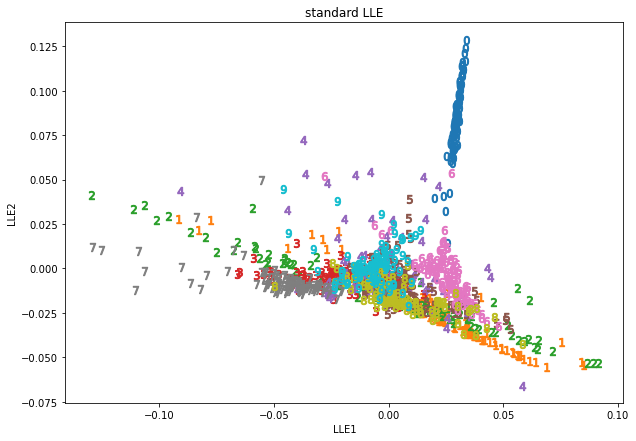

In [10]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors=20,
                           n_components=2,
                           eigen_solver='auto',
                           method='standard', random_state=6).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

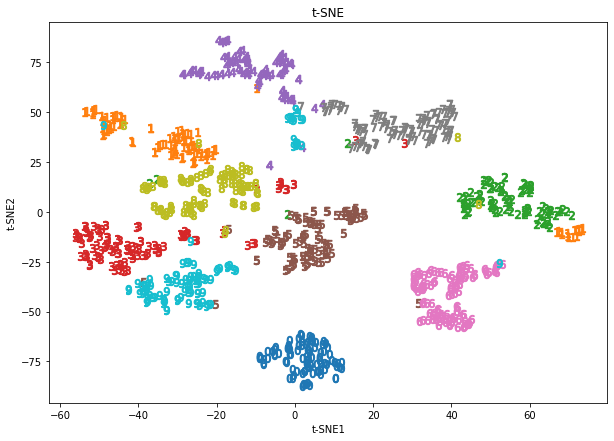

In [11]:
# t-SNE
Y = TSNE(n_components=2,
         perplexity=10, n_iter=1000,
         random_state=6).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()